In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [4]:
#Load Data
data=pd.read_csv("Salaries")
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [5]:
data.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

# perform eda

In [10]:
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [6]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [20]:
data.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

<AxesSubplot:>

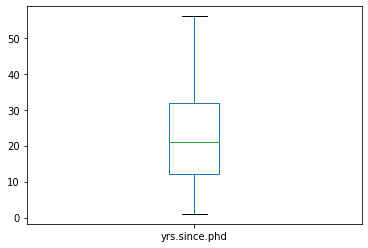

In [24]:
data['yrs.since.phd'].plot.box()

<AxesSubplot:>

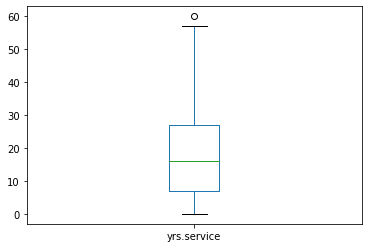

In [25]:
data['yrs.service'].plot.box()

<AxesSubplot:>

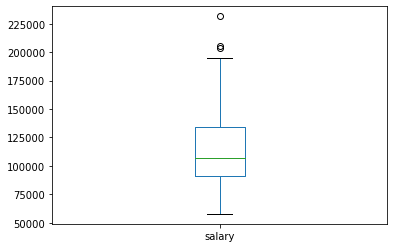

In [26]:
data['salary'].plot.box()

<AxesSubplot:ylabel='Frequency'>

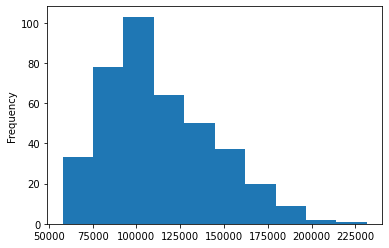

In [28]:
data['salary'].plot.hist()

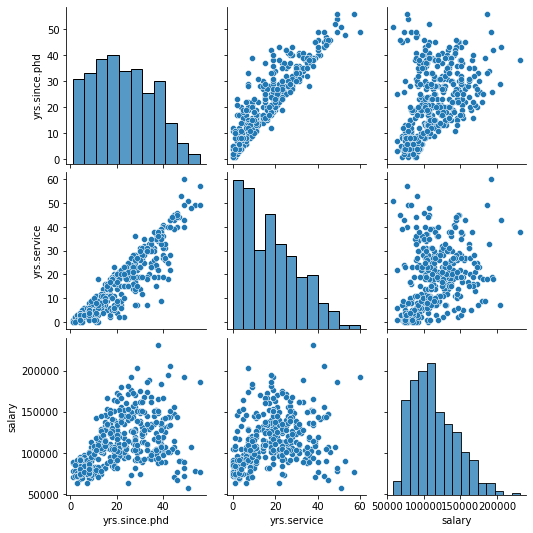

In [43]:
sns.pairplot(data)

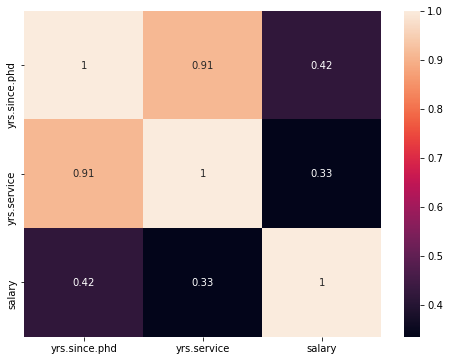

In [44]:
corr_hmap=data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_hmap,annot=True)
plt.show()

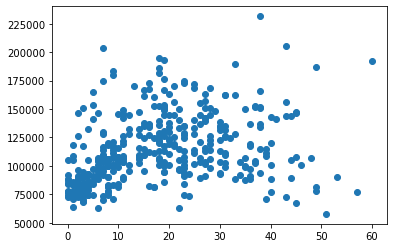

In [48]:
#Visualize data
plt.scatter(data['yrs.service'],data['salary'])
plt.show()

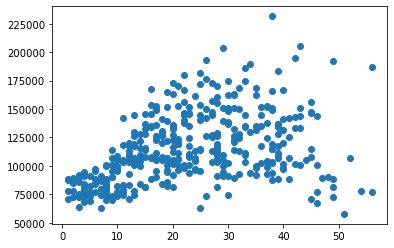

In [47]:
#Visualize data
plt.scatter(data['yrs.since.phd'],data['salary'])
plt.show()

In [79]:
data.drop(['rank','discipline','sex'],axis=1,inplace=True)

KeyError: "['rank' 'discipline' 'sex'] not found in axis"

In [80]:
data.head

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500


In [82]:
data.shape

(397, 3)

In [96]:
x=data.iloc[:,0:3]
x.head()

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500


In [100]:
y=data.iloc[:,-1]
y.head()

0    139750
1    173200
2     79750
3    115000
4    141500
Name: salary, dtype: int64

In [101]:
x.shape

(397, 3)

In [102]:
y.shape

(397,)

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [104]:
x_train.shape

(277, 3)

In [105]:
x_test.shape

(120, 3)

In [106]:
y_train.shape

(277,)

In [107]:
y_test.shape

(120,)

In [108]:
lm=LinearRegression()

In [109]:
lm.fit(x_train,y_train)

LinearRegression()

In [110]:
lm.coef_

array([-1.08117690e-12,  1.39277478e-12,  1.00000000e+00])

In [112]:
lm.intercept_

4.3655745685100555e-11

In [113]:
data.columns

Index(['yrs.since.phd', 'yrs.service', 'salary'], dtype='object')

In [115]:
lm.score(x_train,y_train)

1.0

In [116]:
#predict the value
pred=lm.predict(x_test)
print("Predicted result salary:",pred)
print("actual salary",y_test)

Predicted result salary: [105000. 107100.  63100.  90215. 100131.  83600.  92391.  88000. 103994.
 109954. 129000. 119450. 126933. 126320. 134690. 100000. 101299.  78500.
  57800.  92700. 117150. 128800. 151650. 139750.  83850. 121946.  86100.
  80225. 117555. 148800. 122960. 105450.  98053. 117704. 193000. 162221.
 107550. 134185. 134550.  76840. 106294.  94350.  83900. 114330. 144651.
 150480. 123683.  98193.  67559. 144640. 101100. 100938. 204000.  97032.
 132261.  85000. 142467.  88175. 130664.  95408.  93904.  79916. 139219.
  72500. 194800. 119015. 126431. 103106. 100944. 100102.  97000. 114778.
 125192. 107309. 107150. 115435. 106231.  77500. 115000. 124750. 121200.
 104279.  95436. 103613.  90450. 166024. 150564.  96614. 131950. 113600.
 148500. 163200.  73000. 107986.  78182.  83000.  88650.  73266. 145098.
  81500. 101000. 101000. 104121. 147765. 137000. 170000. 142500. 142023.
 112429. 141136. 174500. 105000.  88709.  90304.  84240. 155865. 103649.
  77500. 116518. 131205.]


In [119]:
print('error:')

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1.0550138540565967e-11
Mean squared error: 3.7234156639720285e-22
Root Mean Squared Error: 1.9296154186707848e-11


In [121]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

1.0
